In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

df = pd.read_csv("cleaned_used_cars_data1.csv", nrows=300000, low_memory=False, index_col='vin')

df.head()

,body_type,fuel_type,horsepower,maximum_seating,mileage,make_name,price,year,transmission,wheel_system,combined_fuel_economy,major_options_count
vin,,,,,,,,,,,,
ZACNJABB5KPJ92081,5,5,177.0,5,7.0,43,23141.0,2019,0,3,26.08,1.000000
SALCJ2FX1LH858117,5,5,246.0,7,8.0,50,46500.0,2020,0,2,26.08,1.000000
SALRR2RV0L2433391,5,5,340.0,7,11.0,50,67430.0,2020,0,2,26.08,6.161011
SALCJ2FXXLH862327,5,5,246.0,7,7.0,50,48880.0,2020,0,2,26.08,1.000000
SALYK2EX1LA261711,5,5,247.0,5,12.0,50,66903.0,2020,0,2,26.08,8.000000


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ['horsepower', 'maximum_seating', 'mileage', 'price', 'year', 'combined_fuel_economy', 'major_options_count']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

RandomForestRegressor_Model = RandomForestRegressor(n_estimators=100, random_state=42)

RandomForestRegressor_Model.fit(X_train,y_train)

y_pred = RandomForestRegressor_Model.predict(X_test)

Mean_Squared_Error = mean_squared_error(y_test, y_pred)
Root_Mean_Squared_Error = np.sqrt(Mean_Squared_Error)

print("Mean Squared Error:", Mean_Squared_Error)
print("Root Mean Squared Error:", Root_Mean_Squared_Error)

Mean Squared Error: 2.136129401406803e-06
Root Mean Squared Error: 0.0014615503417285368


In [41]:
RandomForestRegressor_Model.score(X_test, y_test)

0.9379282566576356

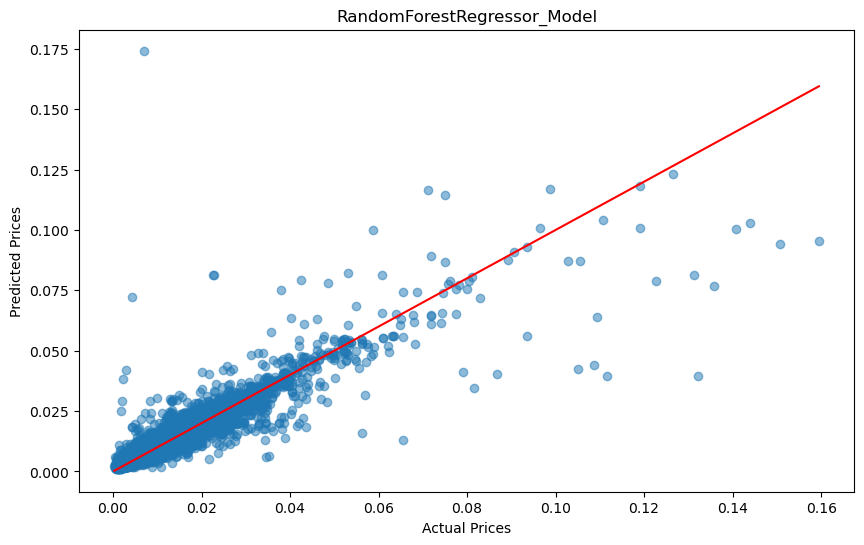

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.scatter(y_test, y_pred, alpha=0.5) 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('RandomForestRegressor_Model')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()


In [44]:
from sklearn.tree import DecisionTreeRegressor

DecisionTreeRegressor_Model = DecisionTreeRegressor()

DecisionTreeRegressor_Model.fit(X_train,y_train)

y_pred = DecisionTreeRegressor_Model.predict(X_test)

Mean_Squared_Error = mean_squared_error(y_test, y_pred)
Root_Mean_Squared_Error = np.sqrt(Mean_Squared_Error)

print("Mean Squared Error:", Mean_Squared_Error)
print("Root Mean Squared Error:", Root_Mean_Squared_Error)

Mean Squared Error: 4.971750937821621e-06
Root Mean Squared Error: 0.002229742347855828


In [45]:
DecisionTreeRegressor_Model.score(X_test, y_test)

0.8555306396834464

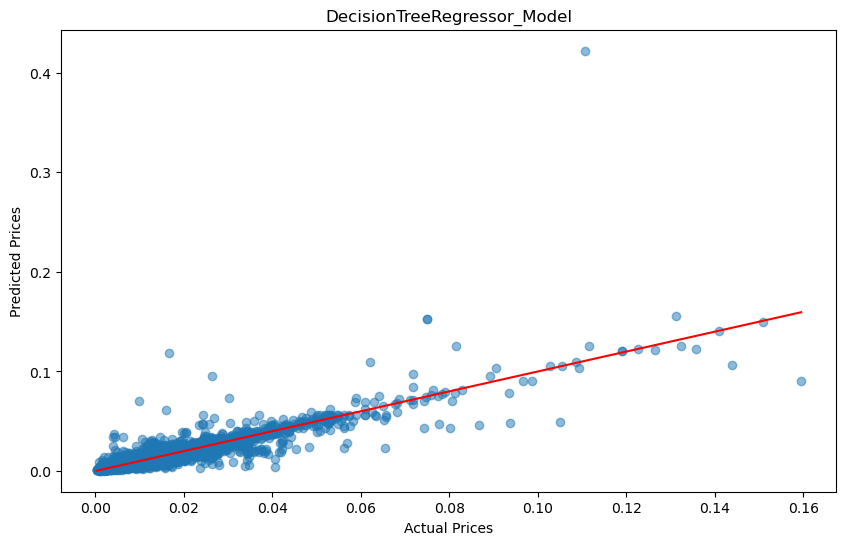

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.scatter(y_test, y_pred, alpha=0.5) 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('DecisionTreeRegressor_Model')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

In [47]:
from sklearn.neighbors import KNeighborsRegressor

KNeighborsRegressor_Model =  KNeighborsRegressor(n_neighbors=5)

KNeighborsRegressor_Model.fit(X_train,y_train)

y_pred = KNeighborsRegressor_Model.predict(X_test)

Mean_Squared_Error = mean_squared_error(y_test, y_pred)
Root_Mean_Squared_Error = np.sqrt(Mean_Squared_Error)

print("Mean Squared Error:", Mean_Squared_Error)
print("Root Mean Squared Error:", Root_Mean_Squared_Error)

Mean Squared Error: 3.8436129084627084e-06
Root Mean Squared Error: 0.001960513429809321


In [48]:
KNeighborsRegressor_Model.score(X_test, y_test)

0.8883121248158593

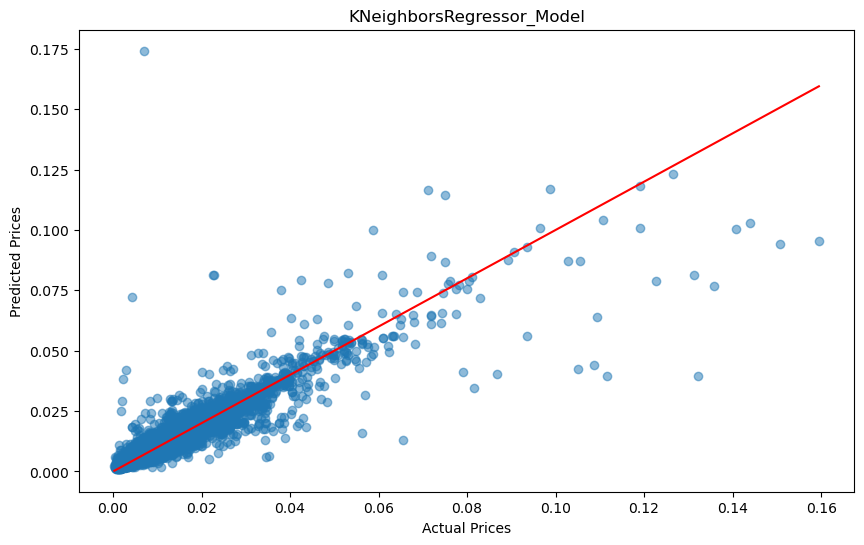

In [50]:
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, y_pred, alpha=0.5) 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('KNeighborsRegressor_Model')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

### Analyysia

##### Random Forest
Mean Squared Error: 2.136129401406803e-06\
Root Mean Squared Error: 0.0014615503417285368\
0.9379282566576356

##### Decision Tree
Mean Squared Error: 5.007856728220697e-06\
Root Mean Squared Error: 0.002237824105737691\
0.854481476016981

##### KNeighbours
Mean Squared Error: 3.8436129084627084e-06\
Root Mean Squared Error: 0.001960513429809321\
0.8883121248158593


Random Forest suoriutui parhaiten jokaisella mittarilla. Decision Tree taas huonoiten. Parempaan lopputulokseen voisi päästä käsittelemällä poikkeukset datassa paremmin ja panostamalla lisää ominaisuuksien muokkaamiseen, sekä luontiin.